# Data Understanding and Tokenization

# Load of datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
directory = '/content/drive/My Drive/PhD_Work/Projects/LT-EDI_2022/Data_Hope'

In [5]:
# imports 
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import defaultdict
from scipy.stats.stats import pearsonr
import numpy as np
import pandas as pd

In [6]:
# readings of the .tsv files
train = pd.read_csv(directory+"/Hope_ENG_train.csv", header=None)
dev = pd.read_csv(directory+"/Hope_ENG_dev.csv", header=None)
en = pd.concat([train, dev], ignore_index=True)

# Data Understanding (of Train and Dev sets)

## General semantics

In [7]:
# visualization of the first 5 records, for example
#en=en.rename(columns = {'0':'text', '1':'category'}, inplace = True)
en.columns = ['text', 'category']
en.head()

,text,category
0,these tiktoks radiate gay chaotic energy and i...,Non_hope_speech
1,@Champions Again He got killed for using false...,Non_hope_speech
2,It's not that all lives don't matter,Non_hope_speech
3,Is it really that difficult to understand? Bla...,Non_hope_speech
4,Whenever we say black isn't that racists? Why...,Non_hope_speech


In [8]:
# generic information about the data such as attributes' names, types and size
en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25581 entries, 0 to 25580
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      25581 non-null  object
 1   category  25581 non-null  object
dtypes: object(2)
memory usage: 399.8+ KB


## Data quality (missing values, outliers, mispelled words) 

In [ ]:
# checking for all columns if they contain any missing values
en.isnull().any()

text        False
category    False
dtype: bool

In [ ]:
# automatic sum of the missing values for every column 
en.isnull().sum()

In [ ]:
df = en 

## Distribution of the variables and categories' statistics 

In [ ]:
en['category'].value_counts()

Non_hope_speech    23347
Hope_speech         2234
Name: category, dtype: int64

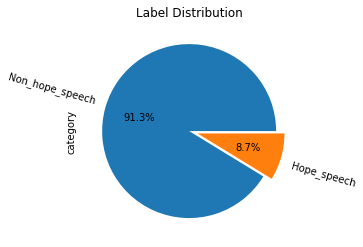

In [ ]:
# pie chart label distribution 
en['category'].value_counts().plot(kind='pie', 
                                   title='Label Distribution',
                                   autopct='%1.1f%%',
                                   explode= (0, 0.1), 
                                   rotatelabels =True)
plt.show()

Text(0.5, 1.0, 'Label Distribution')

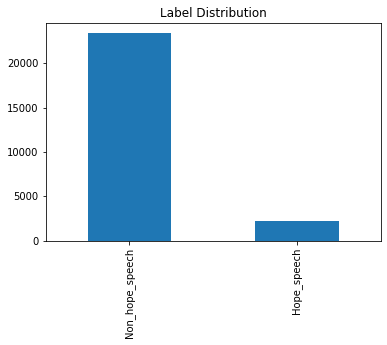

In [ ]:
en['category'].value_counts().plot(kind='bar', stacked=True)
plt.title('Label Distribution')

## Linguistic Analysis for the whole dataset 

In [ ]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import TweetTokenizer

YouTTok = TweetTokenizer()
YouTs = en["text"].apply((lambda x: YouTTok.tokenize(x)))
YouTsString = []
for y in YouTs:
  YouTsString += y
  YouTsString += ", "

In [ ]:
YouTs

In [ ]:
YouTsString

### PoS

PoS Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
listPOS = []
for YouT in YouTs:
  listPOS.append(nltk.pos_tag(YouT))
listPOS[0]

In [ ]:
dictPOS = {}
for YouT in listPOS: 
  dictPOS[YouT[0][0]] = YouT[0][1]
dictPOS

In [ ]:
from nltk import Counter
Counter(dictPOS).most_common(40)

[('Whenever', 'WRB'),
 ('Why', 'WRB'),
 ('When', 'WRB'),
 ('Where', 'WRB'),
 ('How', 'WRB'),
 ('when', 'WRB'),
 ('how', 'WRB'),
 ('why', 'WRB'),
 ('WHEN', 'WRB'),
 ('WHY', 'WRB'),
 ('WHERE', 'WRB'),
 ('where', 'WRB'),
 ('HOW', 'WRB'),
 ('whose', 'WP$'),
 ('What', 'WP'),
 ('Who', 'WP'),
 ('who', 'WP'),
 ('WHAT', 'WP'),
 ('what', 'WP'),
 ('WHO', 'WP'),
 ('Whatever', 'WDT'),
 ('Whoever', 'WDT'),
 ('whatever', 'WDT'),
 ('whomever', 'WDT'),
 ('Which', 'WDT'),
 ('WHICH', 'WDT'),
 ('@willnWhat', 'WDT'),
 ('Is', 'VBZ'),
 ('seems', 'VBZ'),
 ('is', 'VBZ'),
 ('makes', 'VBZ'),
 ('Does', 'VBZ'),
 ('Lives', 'VBZ'),
 ('loves', 'VBZ'),
 ('does', 'VBZ'),
 ('says', 'VBZ'),
 ('Says', 'VBZ'),
 ('Depends', 'VBZ'),
 ('Heres', 'VBZ'),
 ('Always', 'VBZ')]

### FreqDist

In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist(YouTsString)
print(fdist)

<FreqDist with 27374 samples and 509832 outcomes>


In [ ]:
fdist.most_common(40) # da eliminare le stop words

[(',', 25581),
 (' ', 25581),
 ('.', 17845),
 ('the', 12394),
 ('to', 9120),
 ('a', 8222),
 ('is', 7706),
 ('and', 7469),
 ('I', 7464),
 ('of', 5751),
 ('that', 5732),
 ('you', 5179),
 ('!', 4944),
 ('?', 4670),
 ('in', 4441),
 ('are', 4170),
 ('it', 4006),
 ('’', 3990),
 ('people', 3357),
 ('lives', 3282),
 ('matter', 3276),
 ('for', 3174),
 ('not', 3075),
 ('all', 2992),
 ('this', 2734),
 ('with', 2544),
 ('be', 2489),
 ('black', 2482),
 ('they', 2462),
 ('...', 2441),
 ('was', 2348),
 ('have', 2261),
 ('so', 1877),
 ('like', 1848),
 ('just', 1832),
 ('on', 1782),
 ('what', 1734),
 ('about', 1732),
 ('but', 1673),
 ('s', 1550)]

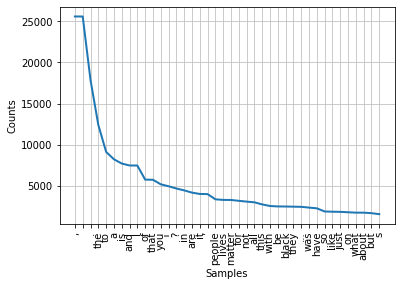

In [ ]:
import matplotlib.pyplot as plt
fdist.plot(40,cumulative=False)
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"']
for x in punkt:
  stopWords.add(x)
print(stopWords)

In [ ]:
filtered_sent=[]
for w in YouTsString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",YouTsString)
print("Filtered Sentence:",filtered_sent)

In [ ]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 27196 samples and 277666 outcomes>


In [ ]:
fdistNoStop.most_common(40)

[(' ', 25581),
 ('I', 7464),
 ('people', 3357),
 ('lives', 3282),
 ('matter', 3276),
 ('black', 2482),
 ('like', 1848),
 ('The', 1432),
 ('white', 1236),
 ('say', 1187),
 ('think', 1093),
 ('one', 1041),
 ('know', 976),
 ('get', 928),
 ('would', 911),
 ('All', 906),
 ('racist', 844),
 ("I'm", 839),
 ('You', 832),
 ('It', 796),
 ('This', 796),
 ('love', 794),
 ('BLM', 780),
 ('saying', 774),
 ('Black', 769),
 ('said', 745),
 ('want', 731),
 ('agree', 722),
 ('..', 713),
 ('If', 679),
 ('right', 675),
 ('really', 641),
 ('life', 629),
 ('“', 615),
 ('She', 611),
 ('God', 579),
 ('police', 572),
 ('They', 565),
 ('see', 560),
 ('even', 559)]

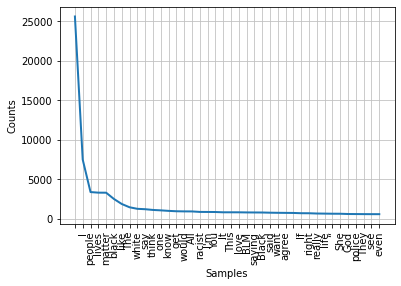

In [ ]:
fdistNoStop.plot(40,cumulative=False)
plt.show()

### Wordcloud

From this tutorial, the wordcloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
textWordCloud = ""
for x in filtered_sent:
  textWordCloud+=x+" "

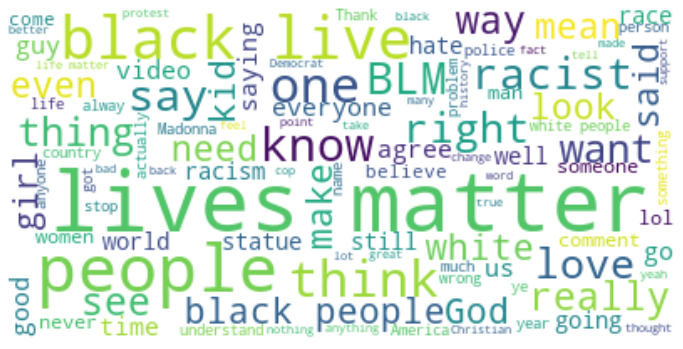

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(textWordCloud)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Hashtag

How many hashtags?

In [ ]:
count = 0
hashtags = []
for x in YouTs:
  for token in x:
    if '#' in token:
        count+=1
        hashtags.append(token.lower())
print(count)
print(hashtags)

240
['#madamex', '#12894', '#realracist', '#justiceforgeorgefloyd', '#madonna', '#name', '#attention', '#name', '#blacklivesmatter', '#name', '#trump2020nn', '#fox', '#vnation', '#name', '#love', '#', '#name', '#imwhiteandnotaracist', '#name', '#name', '#justiceforgeorgefloyd', '#name', '#', '#11', '#12894', '#nolivesmatter', '#', '#name', '#black', '#black', '#name', '#blm', '#name', '#alllivesmatter', '#name', '#name', '#justiceformolu', '#donttalkdowntoyourbutler', '#humanlivesmatter', '#name', '#blacklivesmatter', '#11', '#itsokaytobewhite', '#name', '#11', '#name', '#name', '#name', '#bancheejay', '#blacklivesmatter', '#black', '#blacklivesmatter', '#dumptrump2020', '#name', '#', '#justice4daviddorn', '#name', '#name', '#tonytimpa', '#blacklivesmatter', '#name', '#racismatitsfinestnpeople', '#everyoneslivesmatter', '#', '#name', '#name', '#name', '#alllivesmatter', '#blm', '#blacklivesmatter', '#changetheworld', '#justice', '#name', '#name', '#bml', '#', '#name', '#name', '#name',

In [ ]:
fdistHashTags = FreqDist(hashtags)
print(len(fdistHashTags))
fdistHashTags.most_common(40)

63


[('#name', 98),
 ('#', 19),
 ('#11', 17),
 ('#blacklivesmatter', 15),
 ('#alllivesmatter', 9),
 ('#12894', 7),
 ('#black', 6),
 ('#blm', 6),
 ('#madamex', 2),
 ('#justiceforgeorgefloyd', 2),
 ('#madonna', 2),
 ('#love', 2),
 ('#nolivesmatter', 2),
 ('#nojusticenopeace', 2),
 ('#cking', 2),
 ('#never', 2),
 ('#realracist', 1),
 ('#attention', 1),
 ('#trump2020nn', 1),
 ('#fox', 1),
 ('#vnation', 1),
 ('#imwhiteandnotaracist', 1),
 ('#justiceformolu', 1),
 ('#donttalkdowntoyourbutler', 1),
 ('#humanlivesmatter', 1),
 ('#itsokaytobewhite', 1),
 ('#bancheejay', 1),
 ('#dumptrump2020', 1),
 ('#justice4daviddorn', 1),
 ('#tonytimpa', 1),
 ('#racismatitsfinestnpeople', 1),
 ('#everyoneslivesmatter', 1),
 ('#changetheworld', 1),
 ('#justice', 1),
 ('#bml', 1),
 ('#bluelivesmatter', 1),
 ('#china', 1),
 ('#iran', 1),
 ('#northkorea', 1),
 ('#memememe', 1)]

From https://codereview.stackexchange.com/questions/119607/convert-hashtagstylephrases-to-a-proper-list-of-words

In [ ]:
import re
nltk.download('words')
from nltk.corpus import words, brown
words = list(set(words.words()))
normalizedHashtags=[]

def func_replace(each_func):
    i = 0
    wordsineach_func = []
    while len(each_func) > 0:
        i = i + 1
        word_found = longest_word(each_func)
        if len(word_found) > 0:
            wordsineach_func.append(word_found)
            each_func = each_func.replace(word_found, "")
    return ' '.join(wordsineach_func)

def longest_word(phrase):
    phrase_length = len(phrase)
    words_found = []
    index = 0
    outerstring = ""
    while index < phrase_length:
        outerstring = outerstring + phrase[index]
        index = index + 1
        if outerstring in words or outerstring.lower() in words:
            words_found.append(outerstring)
    if len(words_found) == 0:
        words_found.append(phrase)
    return max(words_found, key=len)

def hashtagger(s):
    result = (re.sub(r"#(\w+)", lambda m: func_replace(m.group(1)), s))
    return result

dictHashTags = (fdistHashTags.keys())

for item in dictHashTags:
  normalizedHashtags.append(hashtagger(item))
#print(hashtagger(hashtags[0]))
normalizedHashtags

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


['madame x',
 '12894',
 'real racist',
 'justice forge or ge f loy d',
 'mado n a',
 'name',
 'attention',
 'black live smatter',
 'trump 2020nn',
 'fox',
 'v nation',
 'love',
 '#',
 'i m w h tean d not ara c st',
 '11',
 'no live smatter',
 'black',
 'b l m',
 'all live smatter',
 'justice form o l u',
 'dont talk down toy our butler',
 'human live smatter',
 'its oka y tobe white',
 'banc he e jay',
 'dump trump 2020',
 'justice 4daviddorn',
 'tony ti m pa',
 'racism at its fine st n people',
 'everyone slive smatter',
 'change thew or l d',
 'justice',
 'b m l',
 'blue live smatter',
 'china',
 'i ran',
 'north kore a',
 'mem e',
 'geo r ge f loy d',
 'black live smatter n',
 'no justice peace',
 'c king',
 'diverse',
 'aha m er is not a gun',
 'only aha m er',
 'tolerant left',
 'tolerant you tube',
 'raise',
 'never',
 'star gate',
 'justice forge or ge',
 'tax',
 'blue',
 'responsible',
 'covid 19',
 'black live sma t er',
 'ni e',
 'all goat live smatter',
 "8can'twait",
 'huma

### Mentions

How many mentions?

In [ ]:
count = 0
ret = []
for x in YouTs:
  for token in x:
    if '@' in token:
        count+=1
        ret.append(token)
print(count)
print(ret)

4450
['@Champions', '@Trey', '@Tea', '@J', '@Fa1con', '@That', '@Molly', '@AtlantisMystic', '@Alex', '@fivedrock', '@Generic', '@Srbin', '@Breanna', '@Provocateur', '@EseKanayo2', '@Riley', '@Toxic', '@Skyfule', '@Al', '@Maggie', '@Flora', '@Marco', '@xBrownskinAngelx', '@Mark', '@mtgamerguy', '@joseph', '@Planet', '@Jessica', '@HipHop', '@t0bias', '@LeslieRené', '@blusafe1', '@Morgan', '@Jay', '@Rick', '@BenjoBanjoo', '@Hi', '@jzizzles', '@Ernest', '@Shayne', '@M', '@Iroor', '@Jay', '@Jack', '@wow', '@Aquariuz', '@Amazing', '@Grip', '@Paul', '@hello', '@Ethan', '@Ras', '@Mario', '@Literal', '@Ronald', '@A', '@American', '@Teehee', '@Jamie', '@Nataliah', '@Eric', '@Gameplay', '@BeeWee', '@zach', '@Sidney', '@D', '@Theodore', '@YOUTUBE', '@Fionabuster', '@Ben', '@THE', '@Molly', '@VIII', '@Nibzu', '@Winston', '@NOXISUM', '@moon', '@BallisticPacifist', '@Adele', '@super', '@Shawn', '@Denise', '@Zero', '@East', '@Glennda', '@W', '@wow', '@Al', '@JP', '@James', '@Generic', '@HermesLVDiva19

In [ ]:
fdistRet = FreqDist(ret)
fdistRet.most_common(40)

[('@', 97),
 ('@Molly', 88),
 ('@TheLegend27', 39),
 ('@Michael', 38),
 ('@The', 37),
 ('@Jessica', 35),
 ('@Alex', 30),
 ('@Jack', 30),
 ('@Maggie', 25),
 ('@Theodore', 25),
 ('@J', 24),
 ('@Dus', 24),
 ('@Anna', 23),
 ('@John', 22),
 ('@Tyrone', 22),
 ('@Jimmy', 20),
 ('@A', 19),
 ('@I', 17),
 ('@Heather', 16),
 ('@Hai', 16),
 ('@Mark', 15),
 ('@xBrownskinAngelx', 14),
 ('@Amazing', 14),
 ('@James', 14),
 ('@Mr', 14),
 ('@Baden', 14),
 ('@Brutal', 14),
 ('@Sasha', 14),
 ('@Gameplay', 13),
 ('@Cáca', 13),
 ('@Jonathan', 13),
 ('@Dangus', 13),
 ('@Marco', 12),
 ('@wow', 12),
 ('@Eric', 12),
 ('@Al', 11),
 ('@American', 11),
 ('@connie', 11),
 ('@kennedy', 11),
 ('@Robert', 11)]

## Linguistic Analysis per category 'Non_hope_speech'


In [ ]:
en = df.loc[df['category'] == 'Non_hope_speech']
en

,text,category
0,these tiktoks radiate gay chaotic energy and i...,Non_hope_speech
1,@Champions Again He got killed for using false...,Non_hope_speech
2,It's not that all lives don't matter,Non_hope_speech
3,Is it really that difficult to understand? Bla...,Non_hope_speech
4,Whenever we say black isn't that racists? Why...,Non_hope_speech
...,...,...
25575,TheLegend27 Is Alive she is literally a boy lol,Non_hope_speech
25576,Such fake sentiment. .,Non_hope_speech
25577,@A G black lives arent undervalued compared to...,Non_hope_speech
25578,People who pulled it down can and will be arre...,Non_hope_speech


In [ ]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import TweetTokenizer

YouTTok = TweetTokenizer()
YouTs = en["text"].apply((lambda x: YouTTok.tokenize(x)))
YouTsString = []
for y in YouTs:
  YouTsString += y
  YouTsString += ", "

In [ ]:
YouTs

In [ ]:
YouTsString

### PoS

PoS Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
listPOS = []
for YouT in YouTs:
  listPOS.append(nltk.pos_tag(YouT))
listPOS[0]

In [ ]:
dictPOS = {}
for YouT in listPOS: 
  dictPOS[YouT[0][0]] = YouT[0][1]
dictPOS

In [ ]:
from nltk import Counter
Counter(dictPOS).most_common(40)

[('Whenever', 'WRB'),
 ('Why', 'WRB'),
 ('When', 'WRB'),
 ('Where', 'WRB'),
 ('How', 'WRB'),
 ('when', 'WRB'),
 ('how', 'WRB'),
 ('why', 'WRB'),
 ('WHEN', 'WRB'),
 ('WHY', 'WRB'),
 ('WHERE', 'WRB'),
 ('where', 'WRB'),
 ('HOW', 'WRB'),
 ('whose', 'WP$'),
 ('What', 'WP'),
 ('Who', 'WP'),
 ('who', 'WP'),
 ('WHAT', 'WP'),
 ('what', 'WP'),
 ('WHO', 'WP'),
 ('Whatever', 'WDT'),
 ('Whoever', 'WDT'),
 ('whatever', 'WDT'),
 ('whomever', 'WDT'),
 ('Which', 'WDT'),
 ('WHICH', 'WDT'),
 ('@willnWhat', 'WDT'),
 ('Is', 'VBZ'),
 ('seems', 'VBZ'),
 ('is', 'VBZ'),
 ('Does', 'VBZ'),
 ('Lives', 'VBZ'),
 ('loves', 'VBZ'),
 ('does', 'VBZ'),
 ('says', 'VBZ'),
 ('Says', 'VBZ'),
 ('Depends', 'VBZ'),
 ('Heres', 'VBZ'),
 ('Always', 'VBZ'),
 ('has', 'VBZ')]

### FreqDist

In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist(YouTsString)
print(fdist)

<FreqDist with 26005 samples and 443475 outcomes>


In [ ]:
fdist.most_common(40) # da eliminare le stop words

[(',', 23347),
 (' ', 23347),
 ('.', 15190),
 ('the', 11134),
 ('to', 7621),
 ('a', 7137),
 ('is', 6623),
 ('and', 6013),
 ('I', 5943),
 ('of', 5042),
 ('that', 4915),
 ('you', 4503),
 ('?', 4453),
 ('!', 4113),
 ('in', 3766),
 ('are', 3592),
 ('it', 3495),
 ('’', 3393),
 ('people', 2911),
 ('lives', 2784),
 ('matter', 2750),
 ('for', 2674),
 ('not', 2614),
 ('all', 2506),
 ('this', 2353),
 ('black', 2268),
 ('they', 2168),
 ('...', 2155),
 ('with', 2152),
 ('was', 2044),
 ('be', 2042),
 ('have', 1965),
 ('like', 1611),
 ('just', 1595),
 ('on', 1580),
 ('about', 1535),
 ('what', 1519),
 ('so', 1492),
 ('but', 1405),
 ('s', 1349)]

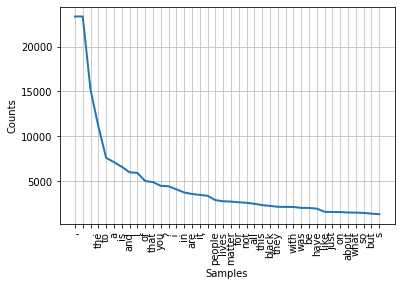

In [ ]:
import matplotlib.pyplot as plt
fdist.plot(40,cumulative=False)
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"']
for x in punkt:
  stopWords.add(x)
print(stopWords)

In [ ]:
filtered_sent=[]
for w in YouTsString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",YouTsString)
print("Filtered Sentence:",filtered_sent)

In [ ]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 25827 samples and 242742 outcomes>


In [ ]:
fdistNoStop.most_common(40)

[(' ', 23347),
 ('I', 5943),
 ('people', 2911),
 ('lives', 2784),
 ('matter', 2750),
 ('black', 2268),
 ('like', 1611),
 ('The', 1321),
 ('white', 1150),
 ('say', 1027),
 ('think', 921),
 ('one', 907),
 ('know', 876),
 ('get', 830),
 ('would', 809),
 ('racist', 769),
 ('BLM', 753),
 ('Black', 720),
 ('You', 720),
 ('saying', 688),
 ('This', 676),
 ('said', 658),
 ('It', 654),
 ('All', 629),
 ('..', 621),
 ("I'm", 611),
 ('If', 606),
 ('agree', 596),
 ('right', 596),
 ('want', 590),
 ('police', 545),
 ('They', 534),
 ('love', 516),
 ('really', 513),
 ('“', 505),
 ('life', 501),
 ('see', 496),
 ('She', 494),
 ('That', 492),
 ('even', 480)]

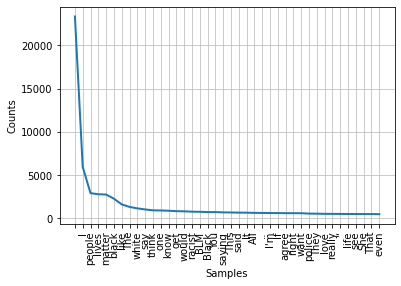

In [ ]:
fdistNoStop.plot(40,cumulative=False)
plt.show()

### Wordcloud

From this tutorial, the wordcloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
textWordCloud = ""
for x in filtered_sent:
  textWordCloud+=x+" "

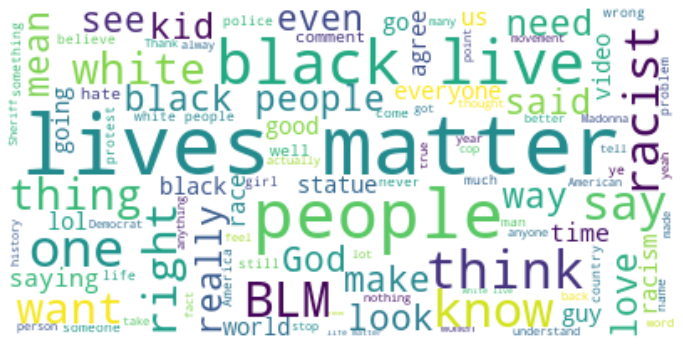

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(textWordCloud)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Hashtag

How many hashtags?

In [ ]:
count = 0
hashtags = []
for x in YouTs:
  for token in x:
    if '#' in token:
        count+=1
        hashtags.append(token.lower())
print(count)
print(hashtags)

229
['#madamex', '#12894', '#realracist', '#justiceforgeorgefloyd', '#madonna', '#name', '#attention', '#name', '#blacklivesmatter', '#name', '#trump2020nn', '#fox', '#vnation', '#name', '#love', '#', '#name', '#imwhiteandnotaracist', '#name', '#name', '#justiceforgeorgefloyd', '#name', '#', '#11', '#12894', '#nolivesmatter', '#', '#name', '#black', '#black', '#name', '#blm', '#name', '#alllivesmatter', '#name', '#name', '#justiceformolu', '#donttalkdowntoyourbutler', '#humanlivesmatter', '#name', '#blacklivesmatter', '#11', '#itsokaytobewhite', '#name', '#11', '#name', '#name', '#name', '#bancheejay', '#blacklivesmatter', '#black', '#blacklivesmatter', '#dumptrump2020', '#name', '#', '#justice4daviddorn', '#name', '#name', '#blacklivesmatter', '#name', '#racismatitsfinestnpeople', '#everyoneslivesmatter', '#', '#name', '#name', '#name', '#alllivesmatter', '#blm', '#blacklivesmatter', '#changetheworld', '#justice', '#name', '#bml', '#', '#name', '#name', '#name', '#name', '#bluelivesma

In [ ]:
fdistHashTags = FreqDist(hashtags)
print(len(fdistHashTags))
fdistHashTags.most_common(40)

60


[('#name', 95),
 ('#', 17),
 ('#11', 16),
 ('#blacklivesmatter', 15),
 ('#alllivesmatter', 8),
 ('#12894', 7),
 ('#black', 6),
 ('#blm', 5),
 ('#madamex', 2),
 ('#justiceforgeorgefloyd', 2),
 ('#madonna', 2),
 ('#love', 2),
 ('#nolivesmatter', 2),
 ('#nojusticenopeace', 2),
 ('#cking', 2),
 ('#never', 2),
 ('#realracist', 1),
 ('#attention', 1),
 ('#trump2020nn', 1),
 ('#fox', 1),
 ('#vnation', 1),
 ('#imwhiteandnotaracist', 1),
 ('#justiceformolu', 1),
 ('#donttalkdowntoyourbutler', 1),
 ('#humanlivesmatter', 1),
 ('#itsokaytobewhite', 1),
 ('#bancheejay', 1),
 ('#dumptrump2020', 1),
 ('#justice4daviddorn', 1),
 ('#racismatitsfinestnpeople', 1),
 ('#everyoneslivesmatter', 1),
 ('#changetheworld', 1),
 ('#justice', 1),
 ('#bml', 1),
 ('#bluelivesmatter', 1),
 ('#china', 1),
 ('#iran', 1),
 ('#northkorea', 1),
 ('#memememe', 1),
 ('#georgefloyd', 1)]

From https://codereview.stackexchange.com/questions/119607/convert-hashtagstylephrases-to-a-proper-list-of-words

In [ ]:
import re
nltk.download('words')
from nltk.corpus import words, brown
words = list(set(words.words()))
normalizedHashtags=[]

def func_replace(each_func):
    i = 0
    wordsineach_func = []
    while len(each_func) > 0:
        i = i + 1
        word_found = longest_word(each_func)
        if len(word_found) > 0:
            wordsineach_func.append(word_found)
            each_func = each_func.replace(word_found, "")
    return ' '.join(wordsineach_func)

def longest_word(phrase):
    phrase_length = len(phrase)
    words_found = []
    index = 0
    outerstring = ""
    while index < phrase_length:
        outerstring = outerstring + phrase[index]
        index = index + 1
        if outerstring in words or outerstring.lower() in words:
            words_found.append(outerstring)
    if len(words_found) == 0:
        words_found.append(phrase)
    return max(words_found, key=len)

def hashtagger(s):
    result = (re.sub(r"#(\w+)", lambda m: func_replace(m.group(1)), s))
    return result

dictHashTags = (fdistHashTags.keys())

for item in dictHashTags:
  normalizedHashtags.append(hashtagger(item))
#print(hashtagger(hashtags[0]))
normalizedHashtags

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


['madame x',
 '12894',
 'real racist',
 'justice forge or ge f loy d',
 'mado n a',
 'name',
 'attention',
 'black live smatter',
 'trump 2020nn',
 'fox',
 'v nation',
 'love',
 '#',
 'i m w h tean d not ara c st',
 '11',
 'no live smatter',
 'black',
 'b l m',
 'all live smatter',
 'justice form o l u',
 'dont talk down toy our butler',
 'human live smatter',
 'its oka y tobe white',
 'banc he e jay',
 'dump trump 2020',
 'justice 4daviddorn',
 'racism at its fine st n people',
 'everyone slive smatter',
 'change thew or l d',
 'justice',
 'b m l',
 'blue live smatter',
 'china',
 'i ran',
 'north kore a',
 'mem e',
 'geo r ge f loy d',
 'black live smatter n',
 'no justice peace',
 'c king',
 'diverse',
 'aha m er is not a gun',
 'only aha m er',
 'tolerant left',
 'tolerant you tube',
 'raise',
 'never',
 'star gate',
 'justice forge or ge',
 'tax',
 'blue',
 'responsible',
 'covid 19',
 'black live sma t er',
 'ni e',
 'all goat live smatter',
 "8can'twait",
 'al m',
 'fact s',
 'e

### Mentions

How many mentions?

In [ ]:
count = 0
ret = []
for x in YouTs:
  for token in x:
    if '@' in token:
        count+=1
        ret.append(token)
print(count)
print(ret)

4264
['@Champions', '@Trey', '@Tea', '@J', '@Fa1con', '@That', '@Molly', '@AtlantisMystic', '@Alex', '@fivedrock', '@Generic', '@Srbin', '@Breanna', '@Provocateur', '@EseKanayo2', '@Riley', '@Toxic', '@Skyfule', '@Al', '@Maggie', '@Flora', '@Marco', '@xBrownskinAngelx', '@Mark', '@mtgamerguy', '@joseph', '@Planet', '@Jessica', '@HipHop', '@t0bias', '@LeslieRené', '@blusafe1', '@Morgan', '@Jay', '@Rick', '@BenjoBanjoo', '@Hi', '@Ernest', '@Shayne', '@M', '@Iroor', '@Jay', '@Jack', '@wow', '@Aquariuz', '@Grip', '@Paul', '@hello', '@Ethan', '@Ras', '@Mario', '@Literal', '@Ronald', '@A', '@American', '@Teehee', '@Jamie', '@Nataliah', '@Eric', '@Gameplay', '@zach', '@Sidney', '@D', '@Theodore', '@YOUTUBE', '@Fionabuster', '@Ben', '@THE', '@Molly', '@VIII', '@Nibzu', '@Winston', '@NOXISUM', '@moon', '@BallisticPacifist', '@Adele', '@super', '@Shawn', '@Denise', '@Zero', '@East', '@Glennda', '@W', '@wow', '@JP', '@Generic', '@HermesLVDiva1976', '@Harverc', '@Bit', '@Marlon', '@Halsey', '@game

In [ ]:
fdistRet = FreqDist(ret)
fdistRet.most_common(10)

[('@', 95),
 ('@Molly', 77),
 ('@Michael', 38),
 ('@The', 36),
 ('@TheLegend27', 35),
 ('@Jessica', 33),
 ('@Alex', 30),
 ('@Jack', 30),
 ('@Theodore', 24),
 ('@Dus', 24)]

## Linguistic Analysis per category 'Hope_speech'


In [ ]:
en = df.loc[df['category'] == 'Hope_speech']
en

,text,category
9,Network Engineer here- 23 and currently workin...,Hope_speech
19,I'm still hiding my gender to my parents and t...,Hope_speech
20,all lives matter .without that we never have p...,Hope_speech
26,Randomgirlwhosings0804 Why does she feel the n...,Hope_speech
45,it doesn't matter what your family does when y...,Hope_speech
...,...,...
25532,i’m actually about to start my college on civi...,Hope_speech
25541,@Sasha Dumse that is true. But we should ALL l...,Hope_speech
25548,Women need to keep fighting,Hope_speech
25573,“God gave me a choice and my choice is love” t...,Hope_speech


In [ ]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import TweetTokenizer

YouTTok = TweetTokenizer()
YouTs = en["text"].apply((lambda x: YouTTok.tokenize(x)))
YouTsString = []
for y in YouTs:
  YouTsString += y
  YouTsString += ", "

In [ ]:
YouTs

In [ ]:
YouTsString

### PoS

PoS Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
listPOS = []
for YouT in YouTs:
  listPOS.append(nltk.pos_tag(YouT))
listPOS[0]

In [ ]:
dictPOS = {}
for YouT in listPOS: 
  dictPOS[YouT[0][0]] = YouT[0][1]
dictPOS

In [ ]:
from nltk import Counter
Counter(dictPOS).most_common(40)

[('Why', 'WRB'),
 ('How', 'WRB'),
 ('When', 'WRB'),
 ('Where', 'WRB'),
 ('when', 'WRB'),
 ('why', 'WRB'),
 ('where', 'WRB'),
 ('What', 'WP'),
 ('what', 'WP'),
 ('Who', 'WP'),
 ('Whatever', 'WDT'),
 ('Whoever', 'WDT'),
 ('makes', 'VBZ'),
 ('Is', 'VBZ'),
 ('Hates', 'VBZ'),
 ('loves', 'VBZ'),
 ('Have', 'VBP'),
 ('Think', 'VBP'),
 ('Guaranteed', 'VBN'),
 ('Born', 'VBN'),
 ('internalized', 'VBN'),
 ('@Amazing', 'VBG'),
 ('studying', 'VBG'),
 ('Inspiring', 'VBG'),
 ('Saying', 'VBG'),
 ('@Morning', 'VBG'),
 ('Beating', 'VBG'),
 ('growing', 'VBG'),
 ('Watching', 'VBG'),
 ('@Ming', 'VBG'),
 ('Being', 'VBG'),
 ('Engineering', 'VBG'),
 ('DEFENDING', 'VBG'),
 ('Having', 'VBG'),
 ('playing', 'VBG'),
 ('Mesmerizing', 'VBG'),
 ('Sitting', 'VBG'),
 ('Love', 'VB'),
 ('please', 'VB'),
 ('Keep', 'VB')]

### FreqDist

In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist(YouTsString)
print(fdist)

<FreqDist with 6179 samples and 66357 outcomes>


In [ ]:
fdist.most_common(40) # da eliminare le stop words

[('.', 2655),
 (',', 2234),
 (' ', 2234),
 ('I', 1521),
 ('to', 1499),
 ('and', 1456),
 ('the', 1260),
 ('a', 1085),
 ('is', 1083),
 ('!', 831),
 ('that', 817),
 ('of', 709),
 ('you', 676),
 ('in', 675),
 ('’', 597),
 ('are', 578),
 ('matter', 526),
 ('it', 511),
 ('for', 500),
 ('lives', 498),
 ('all', 486),
 ('not', 461),
 ('be', 447),
 ('people', 446),
 ('my', 411),
 ('with', 392),
 ('so', 385),
 ('this', 381),
 ('was', 304),
 ('have', 296),
 ('they', 294),
 ('me', 286),
 ('...', 286),
 ('love', 278),
 ('All', 277),
 ('but', 268),
 ('as', 264),
 ('like', 237),
 ('just', 237),
 ('she', 232)]

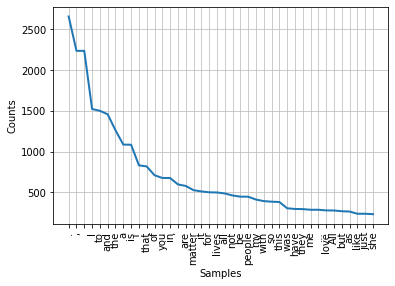

In [ ]:
import matplotlib.pyplot as plt
fdist.plot(40,cumulative=False)
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"']
for x in punkt:
  stopWords.add(x)
print(stopWords)

In [ ]:
filtered_sent=[]
for w in YouTsString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",YouTsString)
print("Filtered Sentence:",filtered_sent)

In [ ]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 6008 samples and 34924 outcomes>


In [ ]:
fdistNoStop.most_common(40)

[(' ', 2234),
 ('I', 1521),
 ('matter', 526),
 ('lives', 498),
 ('people', 446),
 ('love', 278),
 ('All', 277),
 ('like', 237),
 ("I'm", 228),
 ('black', 214),
 ('engineering', 175),
 ('think', 172),
 ('God', 165),
 ('say', 160),
 ('us', 155),
 ('choice', 155),
 ('It', 142),
 ('want', 141),
 ('one', 134),
 ('women', 130),
 ('really', 128),
 ('life', 128),
 ('ALL', 127),
 ('agree', 126),
 ('This', 120),
 ('She', 117),
 ('You', 112),
 ('engineer', 112),
 ('The', 111),
 ('“', 110),
 ('girls', 103),
 ('would', 102),
 ('know', 100),
 ('get', 98),
 ('”', 96),
 ('LIVES', 96),
 ('Lives', 96),
 ('We', 95),
 ('always', 94),
 ('..', 92)]

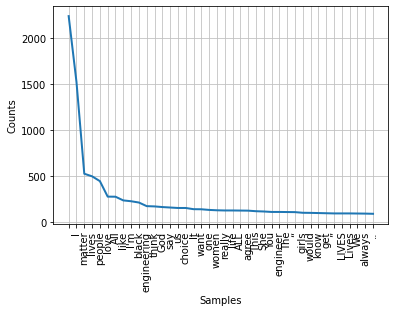

In [ ]:
fdistNoStop.plot(40,cumulative=False)
plt.show()

### Wordcloud

From this tutorial, the wordcloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
textWordCloud = ""
for x in filtered_sent:
  textWordCloud+=x+" "

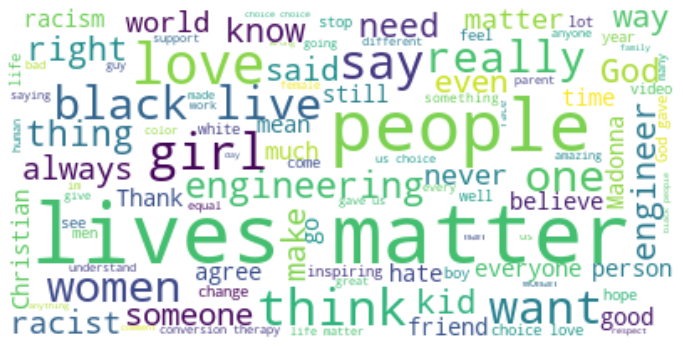

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(textWordCloud)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Hashtag

How many hashtags?

In [ ]:
count = 0
hashtags = []
for x in YouTs:
  for token in x:
    if '#' in token:
        count+=1
        hashtags.append(token.lower())
print(count)
print(hashtags)

11
['#tonytimpa', '#name', '#11', '#alllivesmatter', '#humanracematters', '#noseperations', '#', '#', '#name', '#name', '#blm']


In [ ]:
fdistHashTags = FreqDist(hashtags)
print(len(fdistHashTags))
fdistHashTags.most_common(40)

8


[('#name', 3),
 ('#', 2),
 ('#tonytimpa', 1),
 ('#11', 1),
 ('#alllivesmatter', 1),
 ('#humanracematters', 1),
 ('#noseperations', 1),
 ('#blm', 1)]

From https://codereview.stackexchange.com/questions/119607/convert-hashtagstylephrases-to-a-proper-list-of-words

In [ ]:
import re
nltk.download('words')
from nltk.corpus import words, brown
words = list(set(words.words()))
normalizedHashtags=[]

def func_replace(each_func):
    i = 0
    wordsineach_func = []
    while len(each_func) > 0:
        i = i + 1
        word_found = longest_word(each_func)
        if len(word_found) > 0:
            wordsineach_func.append(word_found)
            each_func = each_func.replace(word_found, "")
    return ' '.join(wordsineach_func)

def longest_word(phrase):
    phrase_length = len(phrase)
    words_found = []
    index = 0
    outerstring = ""
    while index < phrase_length:
        outerstring = outerstring + phrase[index]
        index = index + 1
        if outerstring in words or outerstring.lower() in words:
            words_found.append(outerstring)
    if len(words_found) == 0:
        words_found.append(phrase)
    return max(words_found, key=len)

def hashtagger(s):
    result = (re.sub(r"#(\w+)", lambda m: func_replace(m.group(1)), s))
    return result

dictHashTags = (fdistHashTags.keys())

for item in dictHashTags:
  normalizedHashtags.append(hashtagger(item))
#print(hashtagger(hashtags[0]))
normalizedHashtags

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


['tony ti m pa',
 'name',
 '11',
 'all live smatter',
 'human race matter s',
 'nose per at ion s',
 '#',
 'b l m']

### Mentions

How many mentions?

In [ ]:
count = 0
ret = []
for x in YouTs:
  for token in x:
    if '@' in token:
        count+=1
        ret.append(token)
print(count)
print(ret)

186
['@jzizzles', '@Amazing', '@BeeWee', '@Al', '@James', '@Clinically', '@Ikaika', '@t0bias', '@DANIEL', '@lil', '@PepeThePoopyPants', '@Molly', '@10', '@Pink', '@CLIP', '@mrsimmons2252', '@Destinee', '@Jessica', '@TheLegend27', '@Jacob', '@mindprism', '@Random', '@FortyFore', '@Skrrrt', '@aussiebear22', '@akinadownhillace', '@hana', '@NOXISUM', '@TheCounterpointer', '@WerebatnI', '@', '@colorbar', '@ImAlfie', '@S', '@melancholicmusicboxnnnI', '@Adele', '@westrim', '@kuggacourage', '@Harris', '@Paige', '@Molly', '@Darzo', '@Emilia', '@TheCounterpointer', '@Phoebe', '@Morning', '@Anja', '@Molly', '@Rae', '@Panji', '@Ashley', '@andantina', '@Vera', '@Kazi', '@J', '@EVITA', '@Vinnie', '@jimmy', '@Sunshine', '@kennedy', '@Anneloes', '@K', '@Vernice', '@Tea', '@Kiri', '@DebbieSterling', '@GoldieBlox', '@eve', '@A', '@Chīsana', '@fapnawb', '@Абдуллаев', '@Jeremy', '@Anna', '@coolasice54321', '@TheCounterpointer', '@ZERO', '@Molly', '@Eric', '@Katie', '@BeeWee', '@James', '@derkylos', '@Kapp

In [ ]:
fdistRet = FreqDist(ret)
fdistRet.most_common(10)

[('@Molly', 11),
 ('@Sasha', 6),
 ('@TheLegend27', 4),
 ('@TheCounterpointer', 4),
 ('@Cindy', 4),
 ('@ozzie', 3),
 ('@BeeWee', 2),
 ('@James', 2),
 ('@Jessica', 2),
 ('@FortyFore', 2)]